**FAKE NEWS DETECTION USING ML ALGORITHMS**
Dataset: https://www.kaggle.com/c/fake-news/data#

In [1]:
import pandas as pd

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import io

In [4]:
path = "/content/drive/MyDrive/train.csv"

In [5]:
# df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df = pd.read_csv(path)

In [6]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
## Get the Independent Features

X=df.drop('label',axis=1)

In [8]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [9]:
## Get the Dependent features
y=df['label']

In [10]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [11]:
df.shape

(20800, 5)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [13]:
df=df.dropna()

In [14]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [15]:
messages=df.copy()

In [16]:
messages.reset_index(inplace=True)

In [17]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [18]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [19]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [20]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [21]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [22]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
cv.fit(corpus)
X = cv.transform(corpus).toarray()

In [23]:
X.shape

(18285, 5000)

In [24]:
y=messages['label']

In [25]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [26]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [27]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [28]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [29]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,abstain,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,accus trump,achiev,acknowledg,acknowledg emf,acknowledg emf damag,aclu,acquit,acquitt,acr,across,act,act like,act new,act new york,action,...,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,year sinc,yemen,yet,yet anoth,yiannopoulo,yield,yo,york,york citi,york new,york new york,york state,york time,yorker,young,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
import matplotlib.pyplot as plt

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

In [33]:

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
classifier=MultinomialNB()


AttributeError: ignored

In [34]:
from sklearn import metrics
import numpy as np
import itertools

In [35]:
classifier.fit(X_train, y_train)
# pred = classifier.predict(X_test)
# score = metrics.accuracy_score(y_test, pred)
# print("accuracy:   %0.3f" % score)
# cm = metrics.confusion_matrix(y_test, pred)
# plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# classifier.fit(X_train, y_train)
# pred = classifier.predict(X_test)
# score = metrics.accuracy_score(y_test, pred)
# score

In [ ]:
# y_train.shape

In [ ]:
# model.add(Dense(3, activation='softmax'))

In [36]:
import pickle

In [37]:
with open('/content/drive/MyDrive/Fake1/multinomial_pickle1.pkl','wb') as f:
  pickle.dump(classifier,f)

In [38]:
with open('/content/drive/MyDrive/Fake1/multinomial_pickle1.pkl', 'rb') as fid:
     model1 = pickle.load(fid)

In [ ]:
# testpath = "/content/drive/MyDrive/test.csv"

In [ ]:
# df = pd.read_csv(testpath)

accuracy:   0.902
Confusion matrix, without normalization


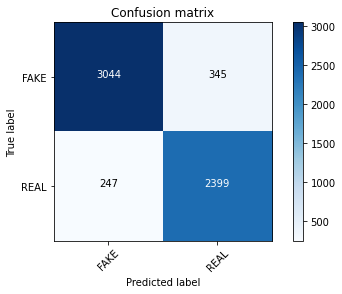

In [39]:
pred = model1.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [40]:
pred = model1.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9019055509527755

### Passive Aggressive Classifier Algorithm

In [41]:
from sklearn.linear_model import PassiveAggressiveClassifier
# linear_clf = PassiveAggressiveClassifier(n_iter=50)
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.920
Confusion matrix, without normalization


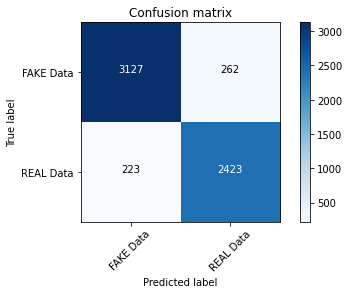

In [42]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [43]:
with open('/content/drive/MyDrive/Fake1/passive_aggressive_pickle1.pkl','wb') as f:
  pickle.dump(linear_clf,f)

### Multinomial Classifier with Hyperparameter

In [44]:
classifier=MultinomialNB(alpha=0.1)

In [45]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8903065451532726
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.30000000000000004, Score : 0.9024026512013256
Alpha: 0.4, Score : 0.9017398508699255
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9022369511184756
Alpha: 0.7000000000000001, Score : 0.9025683512841757
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.9, Score : 0.9017398508699255


In [46]:
## Get Features names
feature_names = cv.get_feature_names()

In [47]:
classifier.coef_[0]

array([ -9.10038883,  -8.62276128,  -9.10038883, ..., -10.79498456,
        -8.91467169,  -9.32864749])

In [48]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.000149156604985, 'trump'),
 (-4.287872694443541, 'hillari'),
 (-4.396389621061519, 'clinton'),
 (-4.899969726208735, 'elect'),
 (-5.176598600897756, 'new'),
 (-5.234730366348767, 'comment'),
 (-5.273968180973631, 'video'),
 (-5.3868167681180115, 'war'),
 (-5.396821854078974, 'us'),
 (-5.412019714988405, 'hillari clinton'),
 (-5.417137433425386, 'fbi'),
 (-5.48068448454208, 'vote'),
 (-5.566255475855405, 'email'),
 (-5.578238842742501, 'world'),
 (-5.634015380199913, 'obama'),
 (-5.734501455772904, 'donald'),
 (-5.763095255139644, 'donald trump'),
 (-5.785090276725191, 'russia'),
 (-5.846224665218559, 'day'),
 (-5.862110622807369, 'america')]

In [49]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.794984555596727, 'abe'),
 (-10.794984555596727, 'abroad'),
 (-10.794984555596727, 'abus new'),
 (-10.794984555596727, 'abus new york'),
 (-10.794984555596727, 'act new'),
 (-10.794984555596727, 'act new york'),
 (-10.794984555596727, 'advic'),
 (-10.794984555596727, 'advis new'),
 (-10.794984555596727, 'advis new york'),
 (-10.794984555596727, 'age new'),
 (-10.794984555596727, 'age new york'),
 (-10.794984555596727, 'agenda breitbart'),
 (-10.794984555596727, 'ail'),
 (-10.794984555596727, 'aleppo new'),
 (-10.794984555596727, 'aleppo new york'),
 (-10.794984555596727, 'ali'),
 (-10.794984555596727, 'america breitbart'),
 (-10.794984555596727, 'america new york'),
 (-10.794984555596727, 'american breitbart'),
 (-10.794984555596727, 'american new'),
 (-10.794984555596727, 'american new york'),
 (-10.794984555596727, 'ami'),
 (-10.794984555596727, 'ami schumer'),
 (-10.794984555596727, 'amp'),
 (-10.794984555596727, 'ann'),
 (-10.794984555596727, 'ann coulter'),
 (-10.794984555596

In [50]:
with open('/content/drive/MyDrive/Fake1/multinomial_hyper_pickle1.pkl','wb') as f:
  pickle.dump(classifier,f)

**NOW Detecting for individual string given in Search Box**


In [51]:
search = str("Russian warships ready to strike terrorists near Aleppo 08.11.2016 | Source: Source: Mil.ru Attack aircraft of the Russian aircraft carrier Admiral Kuznetsov get ready to strike terrorists positions in the vicinity of Aleppo, sources at the Russian Defense Ministry said, RBC reports. Insurgents attempts to break into Aleppo from outside are meaningless, the source said. The main task of the aircraft carrier aviation group is to strike missile and air blows on the terrorists , whose goal is to enter Aleppo. After the attacks on terrorists positions, one will have to forget about the support for insurgents from the outside, the source said. The Russian group in the Mediterranean Sea consists of the Admiral Kuznetsov aircraft carrier , the heavy nuclear missile cruiser Pyotr Velikiy (Peter the Great) and large anti-submarine ships Severomorsk and Vice-Admiral Kulakov. Russia has increased intelligence activities in Syria to establish the areas, where terrorists are concentrated, as well as the routes that they use to move from one area to another. The militants took advantage of the humanitarian pause and regrouped their forces to prepare for a new breakthrough into the eastern part of Aleppo, the source added. According to the source, Russia will use new weapons during the upcoming attacks on terrorists . It was said that the Russian warships in the Mediterranean Sea will launch Caliber cruise missiles, although it was not specified which ships would be responsible for the launches. Pravda.Ru Russian warships travel to Syria")

In [52]:
Testingcorpus = []

In [53]:
review = re.sub('[^a-zA-Z]', ' ', search)
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
Testingcorpus.append(review)

In [54]:
XTEST = cv.transform(Testingcorpus).toarray()

In [55]:
XTEST

array([[0, 0, 0, ..., 0, 0, 0]])

In [56]:
count_df = pd.DataFrame(XTEST, columns=cv.get_feature_names())

In [57]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,abstain,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,accus trump,achiev,acknowledg,acknowledg emf,acknowledg emf damag,aclu,acquit,acquitt,acr,across,act,act like,act new,act new york,action,...,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,year sinc,yemen,yet,yet anoth,yiannopoulo,yield,yo,york,york citi,york new,york new york,york state,york time,yorker,young,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
YTEST = pd.Series([])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [90]:
YTEST[0]=1

In [99]:
pred1 = model1.predict(XTEST)
score = metrics.accuracy_score(YTEST, pred1)
print("accuracy:   %0.3f" % score)

if YTEST[0]==0 and pred1[0]==0 :
  print("News was Fake and DETECTED correctly!")
elif YTEST[0]==0 and pred1[0]==1 :
  print("News was Fake but DETECTED wrong as REAL News!")
elif YTEST[0]==1 and pred1[0]==1 :
  print("News was Real and DETECTED correctly!")
elif YTEST[0]==1 and pred1[0]==0 :
  print("News was Real but DETECTED wrong as Fake News!")


accuracy:   1.000
News was Real and DETECTED correctly!


In [93]:
pred1

array([1])

In [67]:
y_test

13298    0
4816     0
5463     1
11612    0
7476     0
        ..
11811    1
2137     0
2730     0
14030    0
16813    1
Name: label, Length: 6035, dtype: int64